# Carlos David Amezcua Canales - A01641742

# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [42]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [44]:
# Dataset url
url = Ruta + "/datasets/SyntheticData4Clustering_X/SyntheticData4Clustering_X.csv"

# Load the dataset
df  = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [45]:
# Print the dataframe

df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


In [46]:
# get the number of observations and variables

df.shape

(1024, 6)

2. Drop rows with any missing values


In [47]:
# Drop rows with NaN values if existing

df = df.dropna().copy()

# Print the new shape

df.shape

(1024, 6)

3. Scatterplot




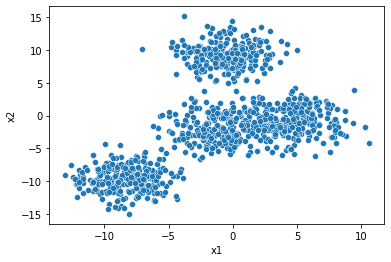

In [48]:
# Scatterplot of x1 and x2

sns.scatterplot(data=df, x="x1", y="x2")
plt.show()

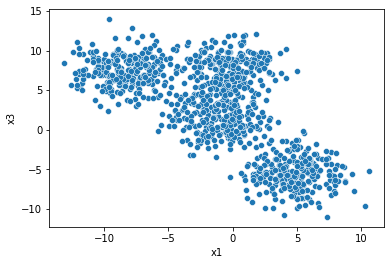

In [49]:
# Scatterplot of x1 and x3

sns.scatterplot(data=df, x="x1", y="x3")
plt.show()

Difficult to plot independetly all combinations, let's use pairplot

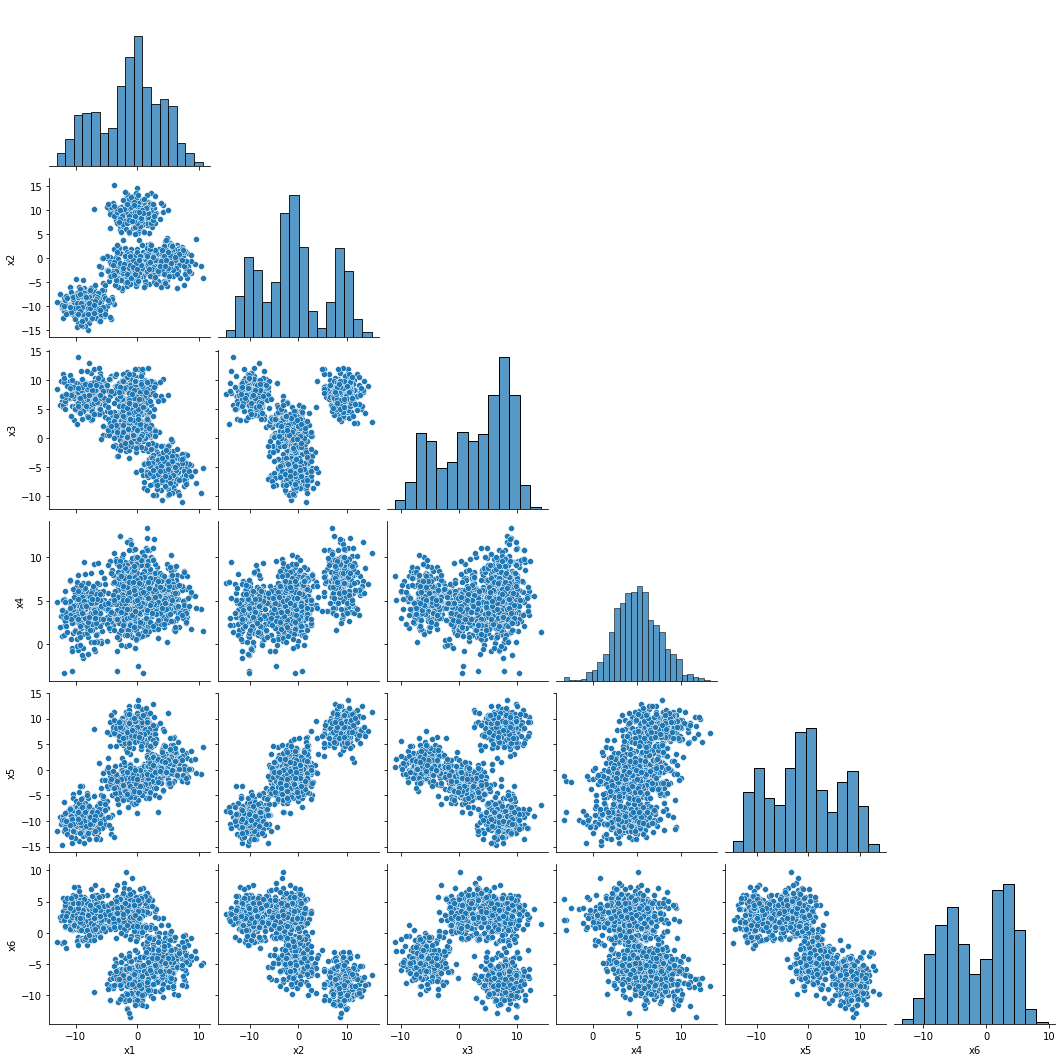

In [50]:
# Pairplot: Scatterplot of all variables

sns.pairplot(df, corner=True)
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [51]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  4 # Let's assume there are 2,3,4,5...? clusters/groups
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
labels = km.fit_predict(df)

# Print estimated cluster of each point in the dataset
labels

array([1, 0, 0, ..., 0, 2, 2], dtype=int32)

In [52]:
# Add a new column to the dataset with the cluster information

df["cluster"] = labels
df

,x1,x2,x3,x4,x5,x6,cluster
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,1
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,0
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,0
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,0
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,2
...,...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649,2
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336,3
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100,0
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975,2


In [53]:
# Laber of the estimated clusters

df.cluster.unique()

array([1, 0, 2, 3], dtype=int32)

In [54]:
# Cluster centroides

km.cluster_centers_

array([[-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ],
       [-1.11162986, -1.97482508,  1.3833106 ,  3.93069765, -2.6359108 ,
         3.22632658],
       [ 4.75634768, -0.75290959, -5.5798822 ,  5.20729319,  1.024779  ,
        -4.30453201],
       [-8.40571071, -9.65151928,  7.45044683,  3.77380481, -9.50855366,
         2.66099801]])

In [55]:
# Sum of squared error (sse) of the final model

# Calculate SSE (sum of squared error)
SSE = km.inertia_

# Print SSE
print("Sum of squared error (SSE) of the final model: ", SSE)

Sum of squared error (SSE) of the final model:  24421.75891123793


In [56]:
# The number of iterations required to converge

# Get number of iterations required for convergence
n_iter = km.n_iter_

# Print number of iterations
print("Number of iterations required for convergence: ", n_iter)

Number of iterations required for convergence:  3


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

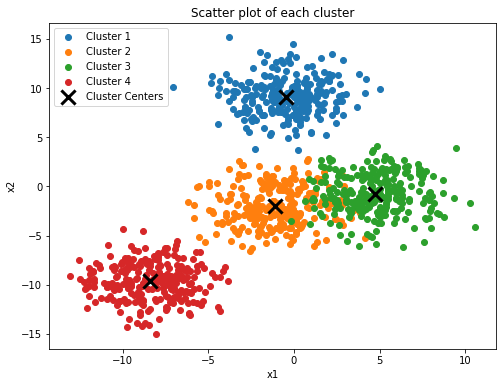

In [57]:
# Get a dataframe with the data of each clsuter

cluster_dfs = [df[df["cluster"] == i] for i in range(K)]

# Scatter plot of each cluster

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(K):
    ax.scatter(cluster_dfs[i]["x1"], cluster_dfs[i]["x2"], label=f"Cluster {i+1}")
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c="black", marker="x", s=200, linewidths=3, label="Cluster Centers")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Scatter plot of each cluster")
ax.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [58]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
ks = range(1, 10)

# For each k
for k in ks:
    # Initialize KMeans object with the number of clusters
    km = KMeans(n_clusters=k, n_init="auto")

    # Fit KMeans object to the data
    km.fit(df)

    # Get sum of squared error (sse) of the final model
    sse.append(km.inertia_)

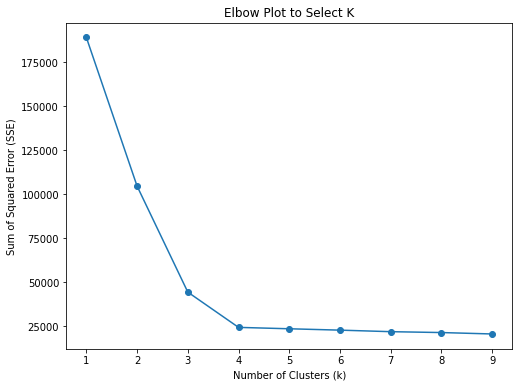

In [59]:
# Plot sse versus k

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ks, sse, marker="o")
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Sum of Squared Error (SSE)")
ax.set_title("Elbow Plot to Select K")
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features



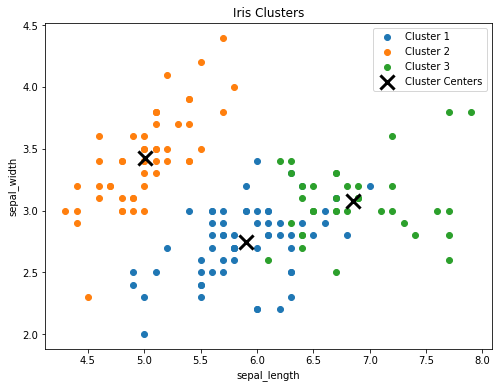

In [87]:
# url string that hosts our .csv file
url = Ruta + "/datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url, header = None, 
                        names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
# Leave only numerical columns
df = df.drop('class', axis=1)

# Define number of clusters
K = 3

# Do K-means clustering (assing each point in the dataset to a cluster) 
km1 = KMeans(n_clusters=K, n_init="auto")
labels1 = km1.fit_predict(df)
df["cluster"] = labels1

# Get a dataframe with the data of each clsuter

cluster_dfs = [df[df["cluster"] == i] for i in range(K)]

# Scatter plot of each cluster

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(K):
    ax.scatter(cluster_dfs[i]["sepal_length"], cluster_dfs[i]["sepal_width"], label=f"Cluster {i+1}")
ax.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], c="black", marker="x", s=200, linewidths=3, label="Cluster Centers")
ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_title("Iris Clusters")
ax.legend()
plt.show()

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features


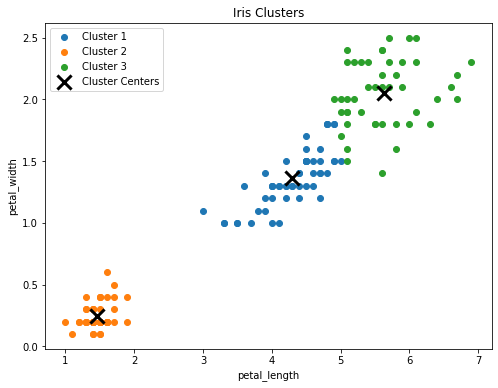

In [88]:
# url string that hosts our .csv file
url = Ruta + "/datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url, header = None, 
                        names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
# Leave only numerical columns
df = df.drop(["sepal_length", "sepal_width", "class"], axis=1)

# Define number of clusters
K = 3

# Do K-means clustering (assing each point in the dataset to a cluster) 
km2 = KMeans(n_clusters=K, n_init="auto")
labels2 = km2.fit_predict(df)
df["cluster"] = labels2

# Get a dataframe with the data of each clsuter

cluster_dfs = [df[df["cluster"] == i] for i in range(K)]

# Scatter plot of each cluster

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(K):
    ax.scatter(cluster_dfs[i]["petal_length"], cluster_dfs[i]["petal_width"], label=f"Cluster {i+1}")
ax.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], c="black", marker="x", s=200, linewidths=3, label="Cluster Centers")
ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_title("Iris Clusters")
ax.legend()
plt.show()

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features


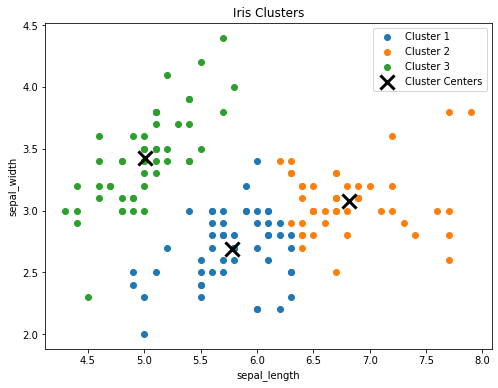

In [89]:
# url string that hosts our .csv file
url = Ruta + "/datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url, header = None, 
                        names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
# Leave only numerical columns
df = df.drop(["petal_length", "petal_width", "class"], axis=1)

# Define number of clusters
K = 3

# Do K-means clustering (assing each point in the dataset to a cluster) 
km3 = KMeans(n_clusters=K, n_init="auto")
labels3 = km3.fit_predict(df)
df["cluster"] = labels3

# Get a dataframe with the data of each clsuter

cluster_dfs = [df[df["cluster"] == i] for i in range(K)]

# Scatter plot of each cluster

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(K):
    ax.scatter(cluster_dfs[i]["sepal_length"], cluster_dfs[i]["sepal_width"], label=f"Cluster {i+1}")
ax.scatter(km3.cluster_centers_[:, 0], km3.cluster_centers_[:, 1], c="black", marker="x", s=200, linewidths=3, label="Cluster Centers")
ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_title("Iris Clusters")
ax.legend()
plt.show()

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics

In [99]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score

df = pd.read_csv(url, header = None, 
                        names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Compute performance metrics for all four features
silhouette_score1 = silhouette_score(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], labels1)
adjusted_rand_score1 = adjusted_rand_score(df['class'], labels1)
homogeneity_score1 = homogeneity_score(df['class'], labels1)

# Compute performance metrics for petal measurements only
silhouette_score2 = silhouette_score(df[['petal_length', 'petal_width']], labels2)
adjusted_rand_score2 = adjusted_rand_score(df['class'], labels2)
homogeneity_score2 = homogeneity_score(df['class'], labels2)

# Compute performance metrics for sepal measurements only
silhouette_score3 = silhouette_score(df[['sepal_length', 'sepal_width']], labels3)
adjusted_rand_score3 = adjusted_rand_score(df['class'], labels3)
homogeneity_score3 = homogeneity_score(df['class'], labels3)

# Finally, we can print the performance metrics and compare the three clustering solutions:
print("Clustering using all four features:")
print("Silhouette score:", silhouette_score1)
print("Adjusted Rand index:", adjusted_rand_score1)
print("Homogeneity score:", homogeneity_score1)
print()
print("Clustering using petal measurements only:")
print("Silhouette score:", silhouette_score2)
print("Adjusted Rand index:", adjusted_rand_score2)
print("Homogeneity score:", homogeneity_score2)
print()
print("Clustering using sepal measurements only:")
print("Silhouette score:", silhouette_score3)
print("Adjusted Rand index:", adjusted_rand_score3)
print("Homogeneity score:", homogeneity_score3)

Clustering using all four features:
Silhouette score: 0.5528190123564102
Adjusted Rand index: 0.7302382722834697
Homogeneity score: 0.7514854021988339

Clustering using petal measurements only:
Silhouette score: 0.6602609959957385
Adjusted Rand index: 0.8509627406851713
Homogeneity score: 0.8357697892170907

Clustering using sepal measurements only:
Silhouette score: 0.4450525692083638
Adjusted Rand index: 0.6006861021484542
Homogeneity score: 0.6463579841342947


Based on the evaluation metrics, it appears that clustering using only the petal measurements may be the best approach for grouping the iris dataset. 